# Cardivascular Disease Prediction

<p style="text-align: center;">
    <img src="original.png" alt="Local Image" width="900">
</p>


The aim of this project to predict the occurence of cardiovascular disease in patients based on their medical records. The project analyzes the patients medical records and medical history to calculate the probability of the occurence of cardiovascular disease in the patient. 

### Data Dictionary

| Feature | Description |
| --- | --- |
| General Health |  general health condition|
| Checkup| Last checkup |
| Excersise | Does the patient excersise |
|Heart Disease | Does the patient have heart disease |
|Skin Cancer | Does the patient have skin cancer |
| Other Cancer | Does the patient have other cancer |
| Depression | Does the patient have depression |
| Diabetes | Does the patient have diabetes |
|Arthritis | Does the patient have arthritis |
|Sex| patient's gender|
|Age-Category| patient's age category|
|BMI| patient's BMI|
|Smoking History| patient's smoking history|
|Alcohol Consumption| patient's alcohol consumption|
|Fruit Consumption| patient's fruit consumption|
|Green Vegetable Consumption| patient's green vegetable consumption|
|Fried Potato Consumption| patient's fried potato consumption|

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r'E:\data science\projact\Cardiovascular Disease Prediction\CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Data Preprocessing

In [3]:
# Checking the shape of the dataset
df.shape

(308854, 19)

In [4]:
# Checking for null/missing values
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
# Checking the datatypes
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

The dataset has columns - weight, Height and BMI. However, the BMI column is calculated using the weight and height columns. Hence, the weight and height columns are dropped from the dataset.

In [6]:
# Drop Column
df.drop(columns=['Weight_(kg)', 'Height_(cm)'], inplace=True)

In [7]:
# Unique values in each column
for i in df.columns:
    print(i, df[i].unique())

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise ['No' 'Yes']
Heart_Disease ['No' 'Yes']
Skin_Cancer ['No' 'Yes']
Other_Cancer ['No' 'Yes']
Depression ['No' 'Yes']
Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis ['Yes' 'No']
Sex ['Female' 'Male']
Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
BMI [14.54 28.29 33.47 ... 63.83 19.09 56.32]
Smoking_History ['Yes' 'No']
Alcohol_Consumption [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
Fruit_Consumption [ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  56.  48.  27.  7

The diabetes column has four values - Yes, No, No pre-diabetes or borderline diabetes and Yes, but female told only during pregnancy. So replacing the last two values with pre-diabetes and gestational diabetes, respectively.

In [8]:
df['Diabetes'] = df['Diabetes'].map({'No, pre-diabetes or borderline diabetes': 'Pre-Diabetes' ,'Yes, but female told only during pregnancy' : 'Gestational Diabetes', 'Yes': 'Yes', 'No': 'No'})

#### Outliner removal

In [45]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

In [9]:
# columns for outlier removal
cols  = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#IQR for the selected columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Threshold for outlier removal
threshold = 1.5

#Find index of outliers
index = np.where((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))[0]

#Drop outliers
df = df.drop(df.index[index])

Descriptive Statistics

In [10]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,186777.000000,186777.000000,186777.000000,186777.000000,186777.000000
mean,28.303577,2.505287,18.446104,11.893440,4.899565
std,5.433758,3.777076,10.898445,9.604871,4.261893
min,12.870000,0.000000,0.000000,0.000000,0.000000
25%,24.370000,0.000000,8.000000,4.000000,2.000000
50%,27.550000,0.000000,16.000000,8.000000,4.000000
75%,31.750000,4.000000,30.000000,16.000000,8.000000
max,43.280000,15.000000,56.000000,44.000000,17.000000


In [11]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0


## Exploratory Data Analysis

In the exploratory data analysis,I will be looking at the data and try to understand the data. I will be analyzing the data to find the relationship between the features and the target variable. I will begin with looking at the distribution of data across all the variables. Then I will look at the relationship between the features and the target variable.

#### Patient demographics

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_4104\87414769.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution')

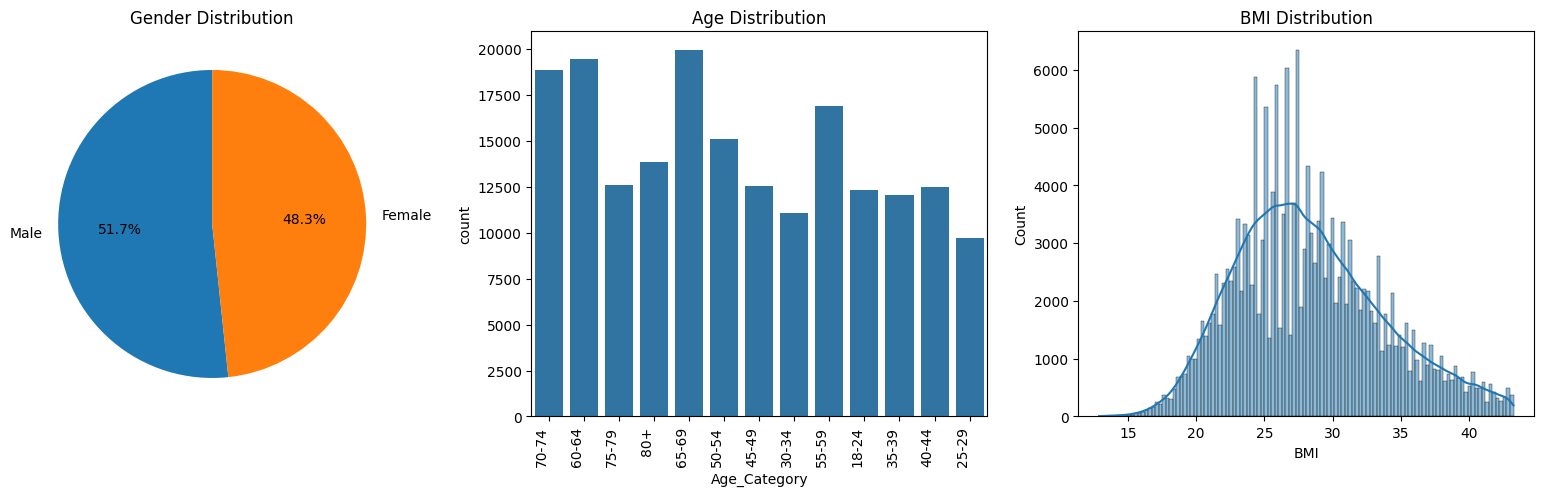

In [12]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].pie(df['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1]).set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

The above three graphs explains the patient demographics in the dataset. From the pie chart, it is clear that majority of ptients are male with 52% followed by females with 48%. Looking at the age distribution, we came to know that majority of patients are older than 45 years of age, this means that the dataset is skewed towards older patients. The histogram of BMI shows that the BMI of majority of patients is between 25 to 30. This means that majority of patients are overweight. Therefore, I build a hypothesis that the patients with higher BMI are more likely to have cardiovascular disease.

#### General Health and Last Checkup

Text(0.5, 1.0, 'General Health and Checkup')

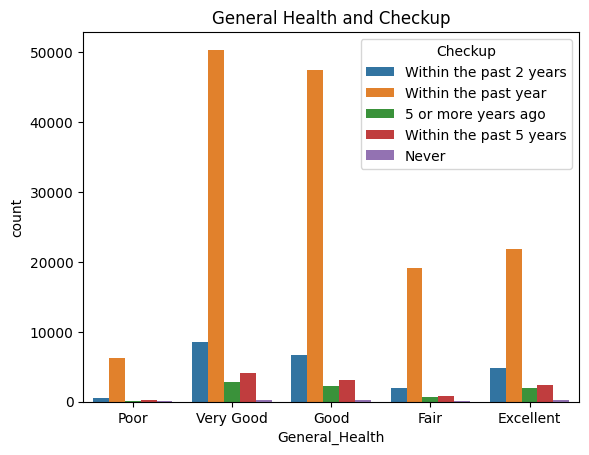

In [13]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Checkup').set_title('General Health and Checkup')

According to this graph most of the people are either in good or very good health, followed by excellent general health. This means that most of the people in the dataset are healthy. Very few of the people are poor general health. Lookinng at the last checkup, in all the general healths, most of the people have had their last checkup within the last year. However, there are still many people who have not had their last checkup within the last 5 years or more. This increases, the chances of having a potential cardiovascular disease.

#### Excersise and General Health

Text(0.5, 1.0, 'General Health and Exercise')

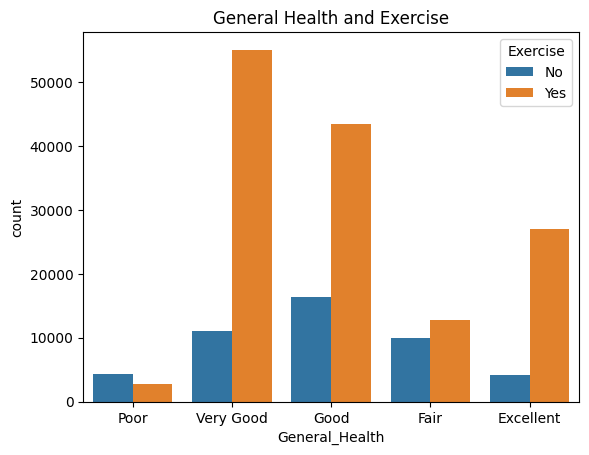

In [14]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Exercise').set_title('General Health and Exercise')

The role of exercise in general health is evident thtough this graph. The people who excersise regularly are more likely to be in good or very good or even in excellent health. However, the people who do not excersise are more likely to be in poor health. This means that excersise plays an important role in maintaining good health.

#### Food Consumption

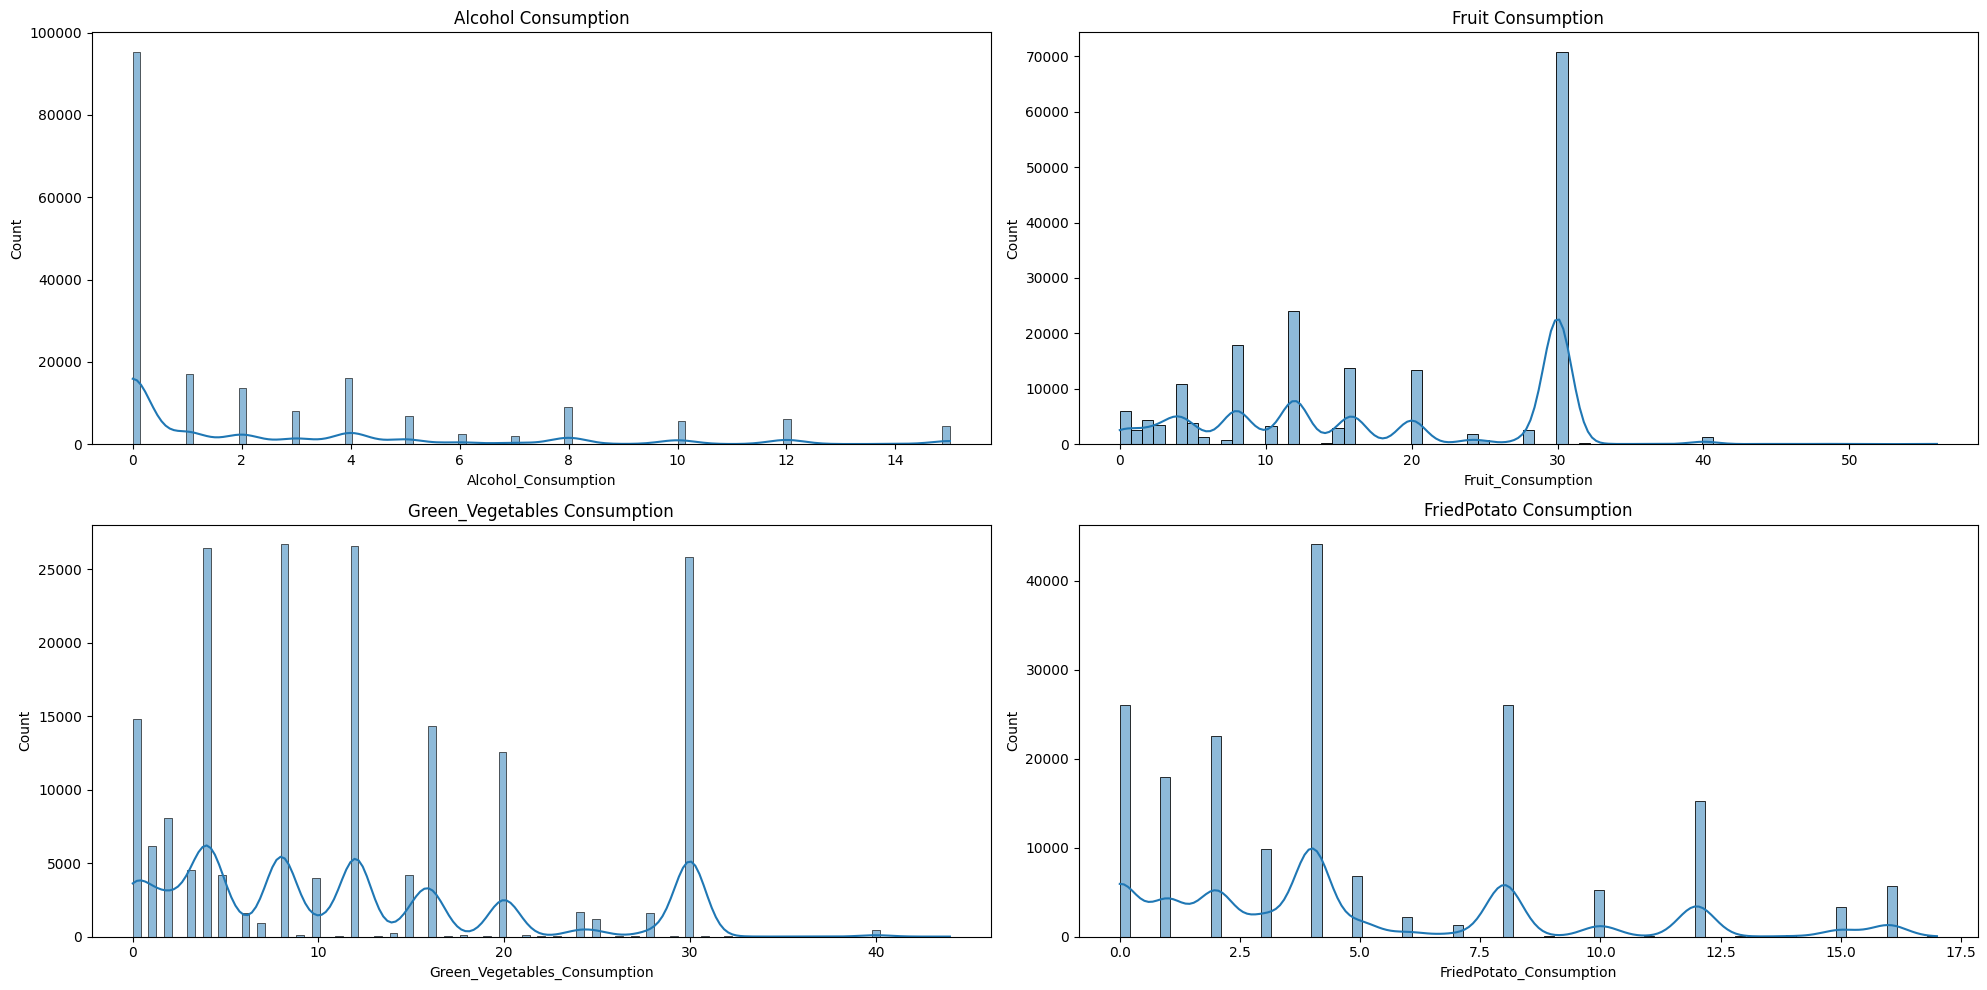

In [15]:
fig, ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(x = 'Alcohol_Consumption', data = df, ax = ax[0,0], kde = True).set_title('Alcohol Consumption')
sns.histplot(x = 'Fruit_Consumption', data = df, ax = ax[0,1], kde = True).set_title('Fruit Consumption')
sns.histplot(x = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0], kde = True).set_title('Green_Vegetables Consumption')
sns.histplot(x = 'FriedPotato_Consumption', data = df, ax = ax[1,1], kde = True).set_title('FriedPotato Consumption')
plt.tight_layout()


These plots visualizes the food and drinking habits of the patients. From these plots, it is clear that majority of the patients, do not consume alcohol. Coming to the food habits, most of the patients, consume higher amount of fruits and green vegetables which is good for health. However, most of the patients consume fried potatoes which is not good for health. This means that the patients who consume fried potatoes and alcohol are more likely to have cardiovascular disease.

#### Medical History

Text(0.5, 1.0, 'Arthritis')

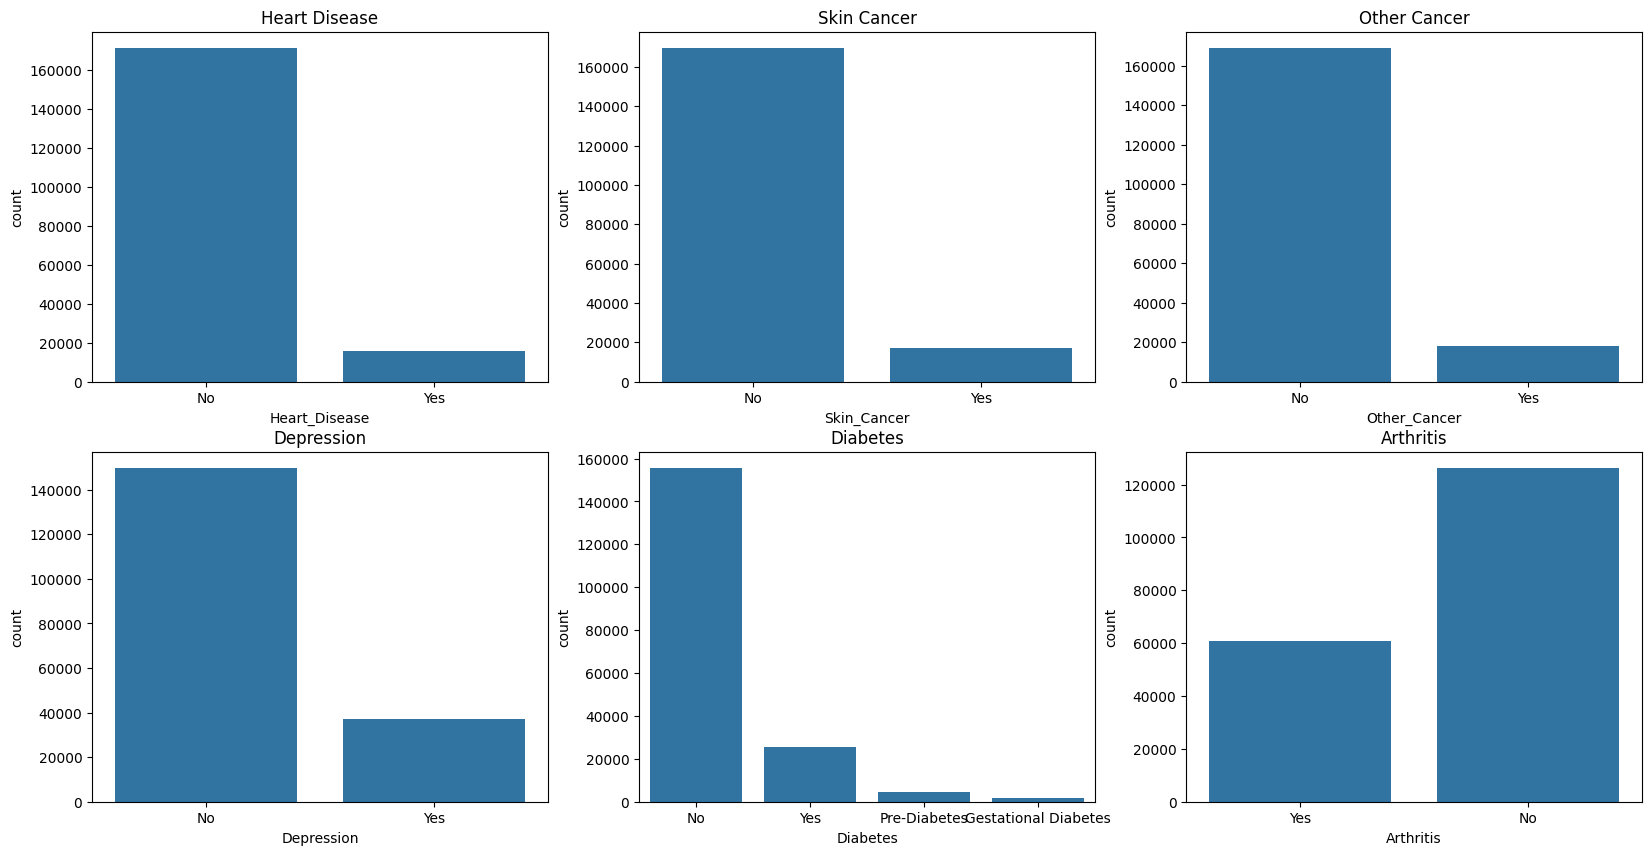

In [16]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Heart_Disease', data = df, ax = ax[0,0]).set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1]).set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2]).set_title('Other Cancer')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0]).set_title('Depression')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1]).set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2]).set_title('Arthritis')

Most of the patients have no medical conditions. However, there are patients who have medical conditions like heart disease, skin cancer, other cancer, depression, diabetes and arthritis. In addition to that, there has been increased number of patients suffering ftom Depression as compared to other medical conditions. This means, the doctor should focus on mental health as well in addtion to physical health. There certain number of patients, who are pre-diabetic and some females suffer from gestational diabetes. 

#### Patient's Smoking History

Text(0.5, 1.0, 'Smoking History')

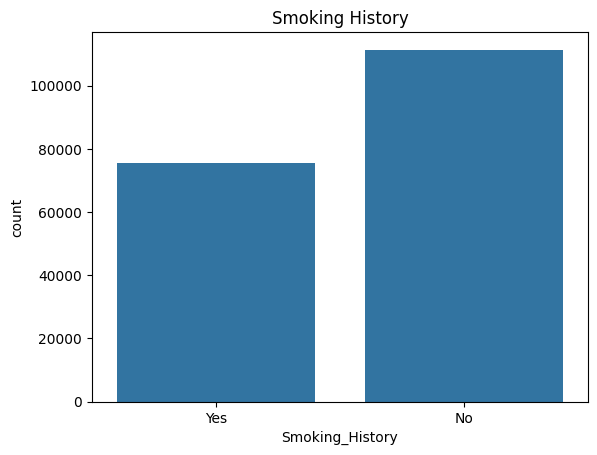

In [17]:
sns.countplot(x = 'Smoking_History', data = df ).set_title('Smoking History')

This graph shows the smoking history of the patients in the dataset. Majority of the patients have never smoked. However, there are patients in huge number who are current smokers. This means that the patients who are current smokers are more likely to have cardiovascular disease.

### Target Variable and Independent Variables Visualization

#### Patient's Demographics and Heart Disease

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_4104\1378494049.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

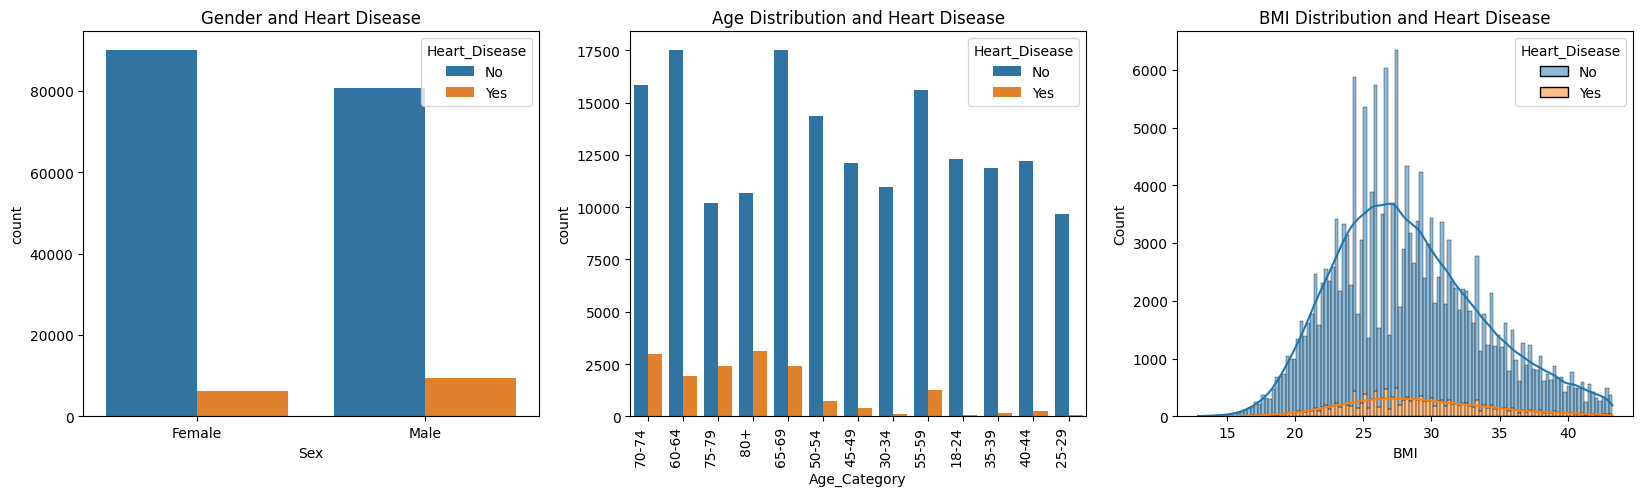

In [18]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

Visualizing the patient's demographics along with the heart disease, help us to know more about the relation of cardiovascular disease with patient. Firstly looking at the Gender graph, we can see that, males are more prone to heart disease as compared to females. The second graph reveals interesting facts about the data, where we can we that patientis with age higher than 55 years of age have increased instances of heart diseases, as compared to other age groups, with maximum heart disease cases in 80+ years of age patient. This means that patients older age are more prone to cardiovascular disease and the risk of cardivascular diases increases with age. The third graph, which is about BMI, shows that, patients with BMI between 25-30 i.e. overweight, have higher chances of heart disease.

#### General Health and Heart Disease

Text(0.5, 1.0, 'General Health and Heart Disease')

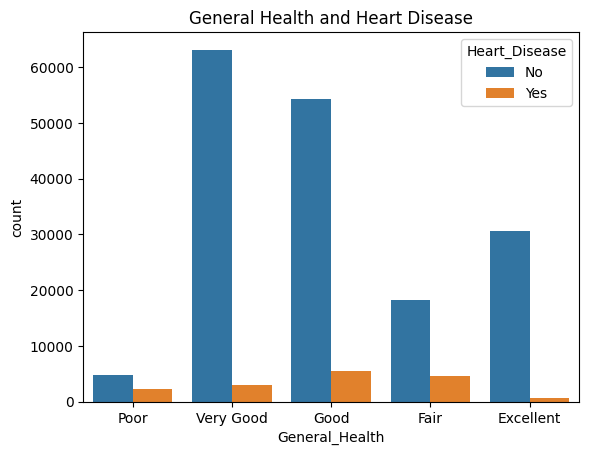

In [19]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Heart_Disease').set_title('General Health and Heart Disease')

This graph is in contrast to my belief that, healthy patients are less prone to heart disease. However, this graph shows that patients with very good ot good general health have more chances of heart disease as compared to patients with poor general health.

#### Checkup and Heart Disease

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

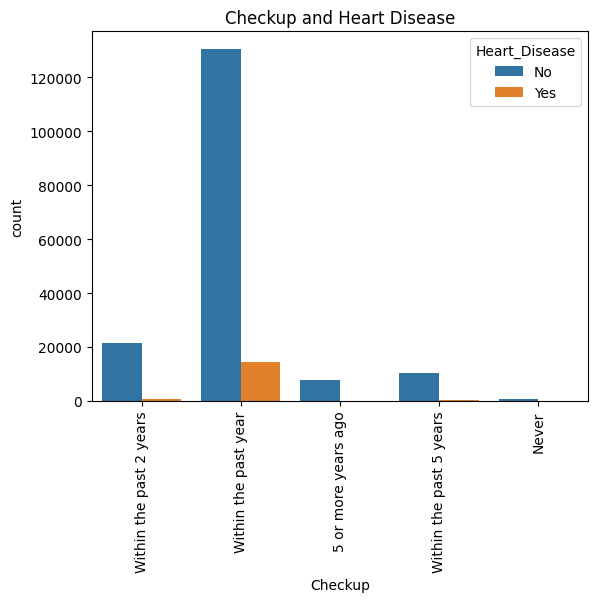

In [20]:
sns.countplot(x = 'Checkup', data = df, hue  = 'Heart_Disease').set_title('Checkup and Heart Disease')
plt.xticks(rotation=90)

According to this graph, patients who have checkup in the last year have higher chances of having heart disease. This means that, patients who got themselves checked more often have higher chances of diagnosing cardiovascular disease at an early stage, as compared to patients who do not get themselves checked regularly.

#### Excercise and Heart Disease

Text(0.5, 1.0, 'Exercise and Heart Disease')

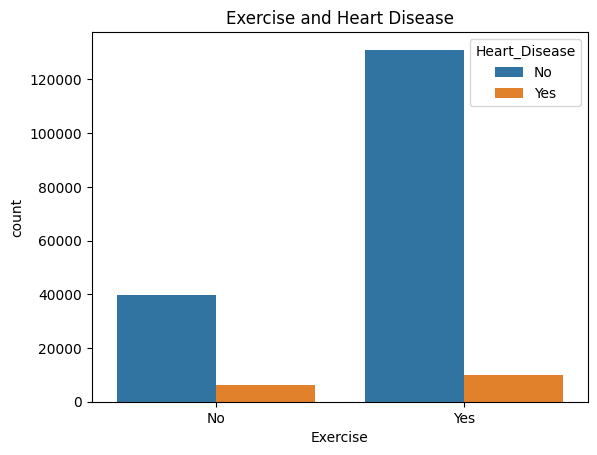

In [21]:
sns.countplot(x = 'Exercise', data = df, hue  = 'Heart_Disease').set_title('Exercise and Heart Disease')

Interestingly, the patients that exercise tend to have higher rates of heart disease. This is in contrast to my belief that, patients who exercise regularly are less prone to heart disease. However, this graph shows that patients who do not exercise are less prone to heart disease. This could be possible that, patients that have weak hearts, tend to put extensive pressure on their heart by exercising, which leads to heart disease.

#### Food Consumption and Heart Disease

Text(0.5, 1.0, 'FriedPotato Consumption and Heart Disease')

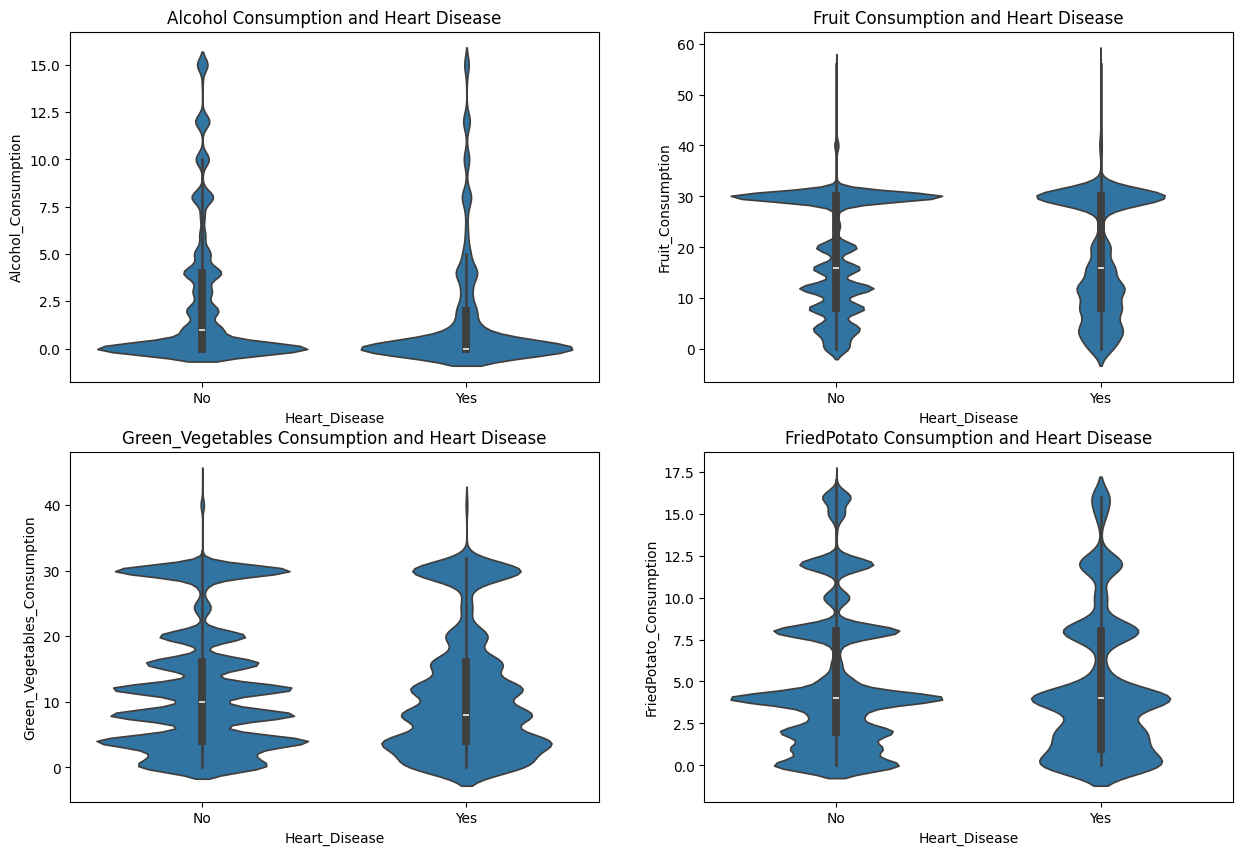

In [22]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.violinplot(x = 'Heart_Disease', y = 'Alcohol_Consumption', data = df, ax = ax[0,0]).set_title('Alcohol Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Fruit_Consumption', data = df, ax = ax[0,1]).set_title('Fruit Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0]).set_title('Green_Vegetables Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'FriedPotato_Consumption', data = df, ax = ax[1,1]).set_title('FriedPotato Consumption and Heart Disease')

These graphs visualizes the patient's food and drinking habit along with their heart disease. Looking at the alcohol consumption graph, we can see that patients with increased alcohol consumption tend to have lower chances of heart disease. However, the patients with higher consumption on fruits and green vegetables, tend to have lower risk of heart diseases. In addition to that, patients with higher consumption of fried potatoes tend to have higher risk of heart disease.

#### Medical History and Heart Disease

Text(0.5, 1.0, 'Arthritis and Heart Disease')

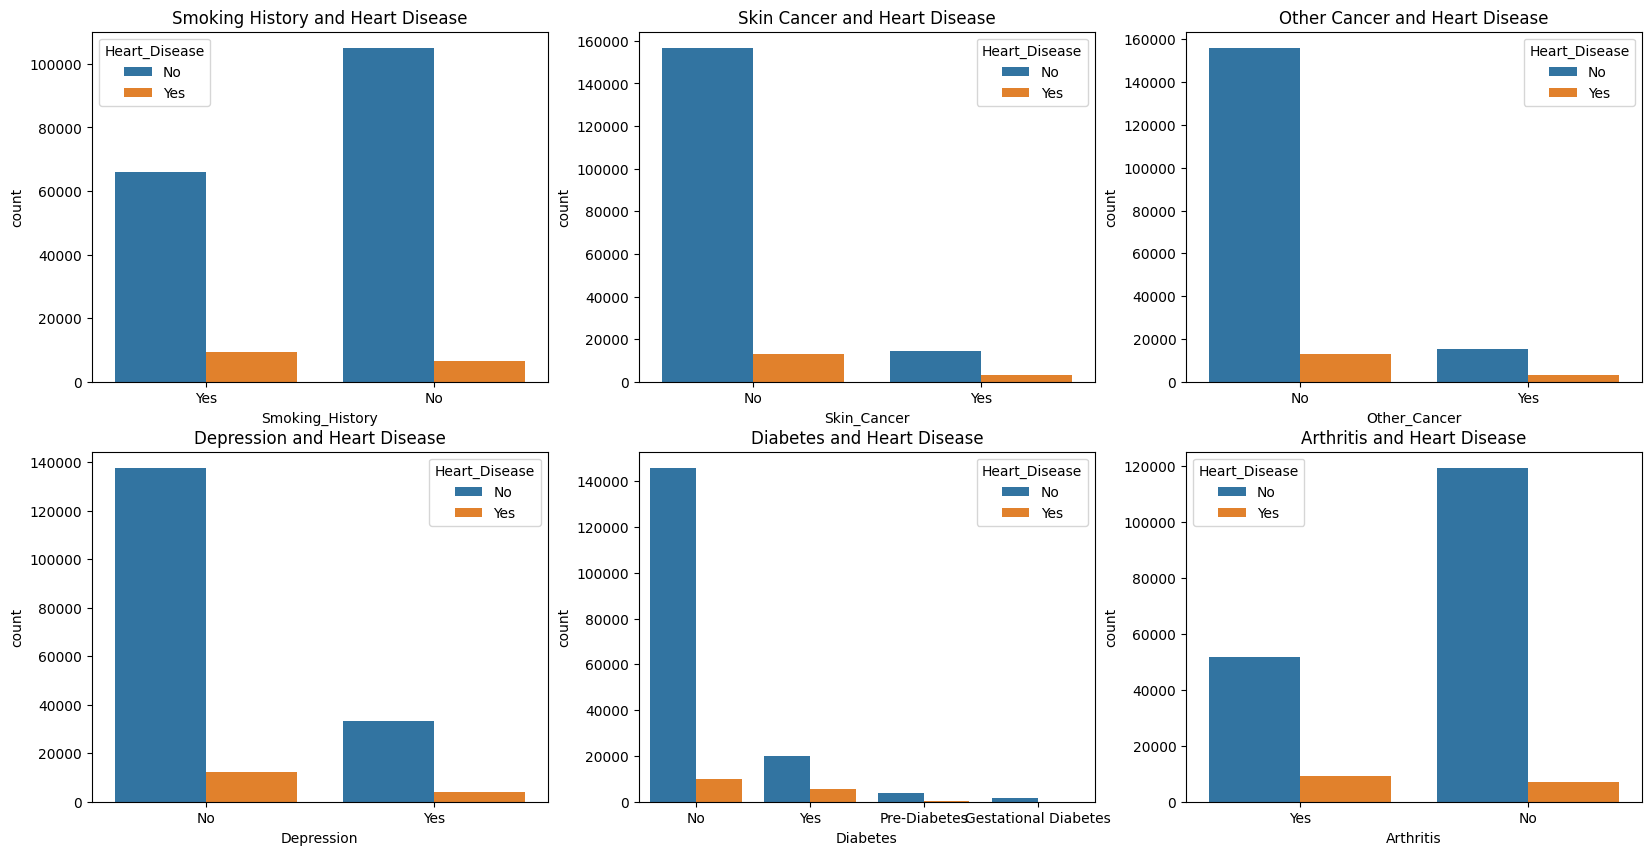

In [23]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Smoking_History', data = df, ax = ax[0,0], hue = 'Heart_Disease').set_title('Smoking History and Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1], hue = 'Heart_Disease').set_title('Skin Cancer and Heart Disease')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2], hue = 'Heart_Disease').set_title('Other Cancer and Heart Disease')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0], hue = 'Heart_Disease').set_title('Depression and Heart Disease')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1], hue = 'Heart_Disease').set_title('Diabetes and Heart Disease')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2], hue = 'Heart_Disease').set_title('Arthritis and Heart Disease')

These graphs visualizes patient's medical history and its relation with heart disease. In the first graph, which is about smoking history, we can see that patients who smoke or used to smoke tend to have higher instances of having cardiovascular disease. In the second graph, we can see that patients with no skin cancer have higher cases of having heart disease as compared to its counterpart. In addtion to that it is evident from the third graph, that patient without any kind of cancer have higher cases of having a cardiovascular disease. In the fourth graph, we can see that patients with no depression have higher cases of having heart disease as compared to its counterpart. In the fifth graph, we can see that patients with no diabetes have higher cases of having heart disease and pre-diabetes or gestational diabetes have zero or no effect on heart diseases. In the last graph, we can see that patients with no arthritis have higher cases of having heart disease as compared to its counterpart.

##### From this, I conclude that, patients with medical history have no major effect on having a cardiovacular disease.

## Data Preprocessing 2

#### Label Encoding the Categorical Variables

In [24]:
from sklearn.preprocessing import LabelEncoder

# List of categorical variables
cols = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis',	'Sex',	'Age_Category', 'Smoking_History']

# Label encoding object
le = LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [1 3 2 0]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  2  7  0  3  4  1]
Smoking_History [1 0]


## Coorelation Matrix Heatmap

<Axes: >

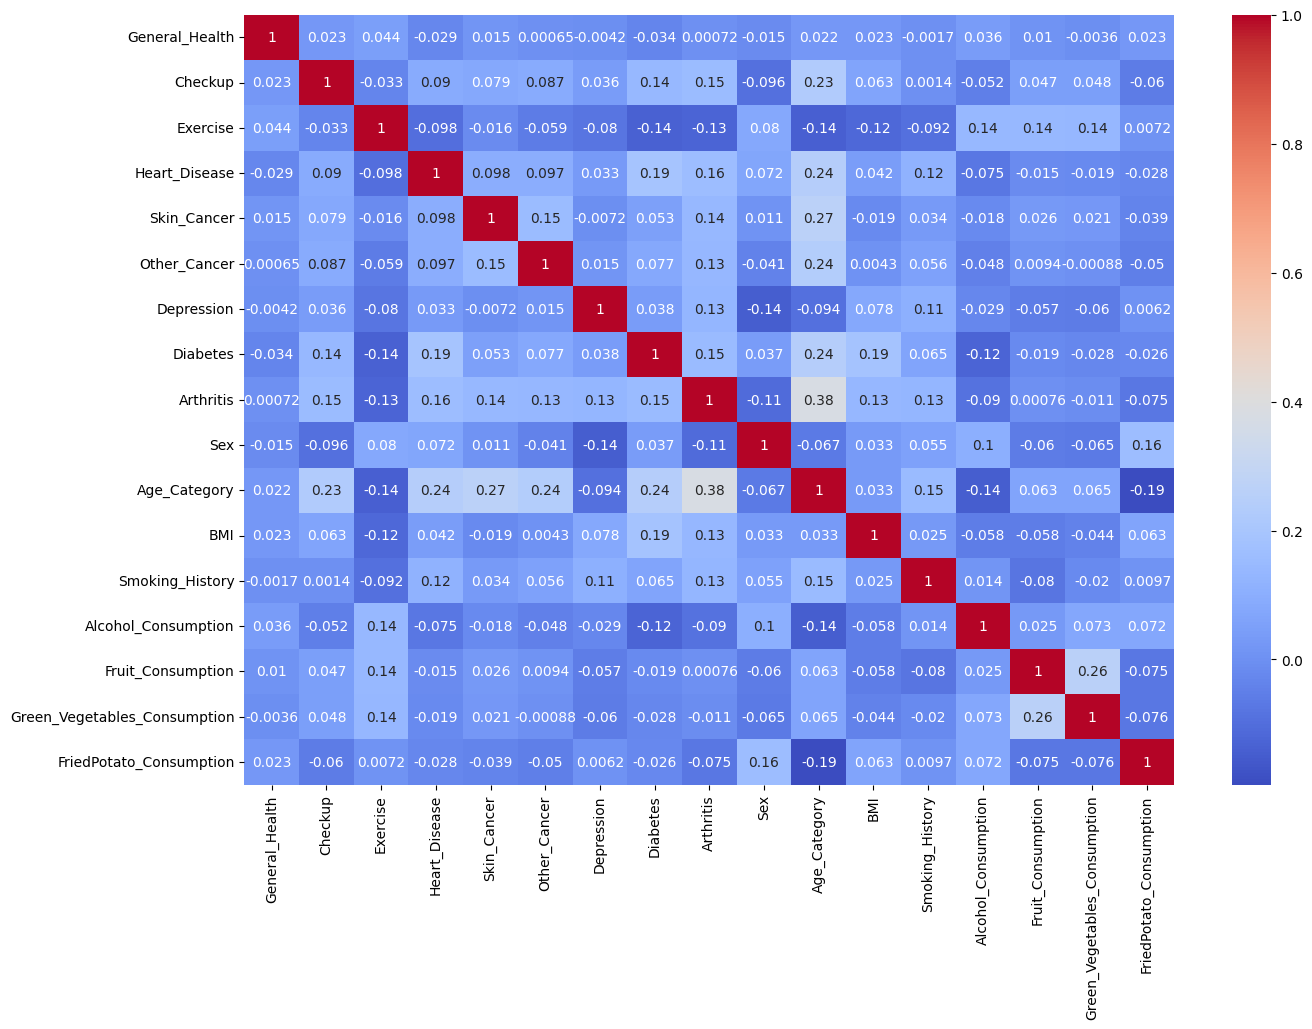

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

There is no major coorelation among the variales.

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Heart_Disease']), df['Heart_Disease'], test_size = 0.2, random_state = 0)

## Cardiovascular Disease Prediction

For predicting the cardiovascular disease, I have used the following classification models:
1. Random Forest Classifier
2. Decision Tree Classifier

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest object
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')

In [28]:
# Training the model
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [29]:
# Training accuracy
rfc.score(X_train, y_train)

0.9999866150005688

In [30]:
# Predicting the test set results
rfc_pred = rfc.predict(X_test)

### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree object
dtc = DecisionTreeClassifier(random_state=0, max_depth= 12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

In [32]:
# Training the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [33]:
# Training accuracy
dtc.score(X_train, y_train)

0.73877835110192

In [34]:
# Predicting the test set results
dtc_pred = dtc.predict(X_test)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [36]:
#Training the model
lr.fit(X_train, y_train)

c:\Users\AL-MOSTAFA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
#Training accuracy
lr.score(X_train, y_train)

0.9141151511501061

In [38]:
#Predicting the test set results
lr_pred = lr.predict(X_test)

## Model Evalution

### Confusion Matrix

Text(0.5, 1.0, 'Logistic Regression')

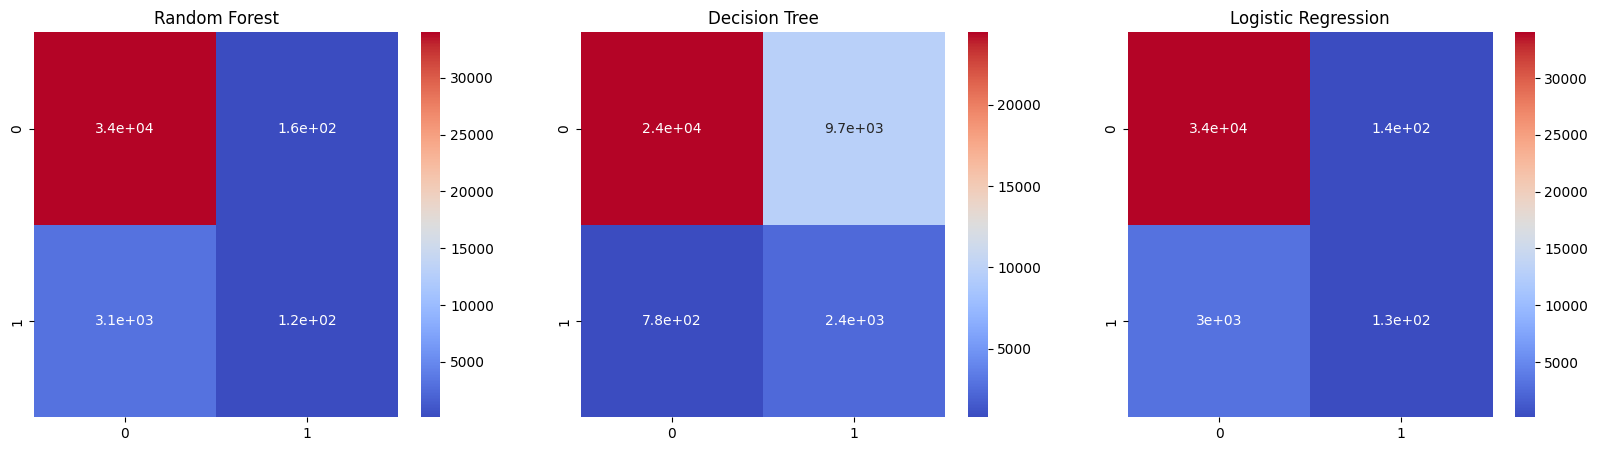

In [39]:
from sklearn.metrics import confusion_matrix
fig, ax  = plt.subplots(1,3, figsize = (20,5))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, cmap = 'coolwarm', ax = ax[0]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot = True, cmap = 'coolwarm', ax = ax[1]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot = True, cmap = 'coolwarm', ax = ax[2]).set_title('Logistic Regression')

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,mean_squared_error, mean_absolute_error
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, rfc_pred))
print('Precision Score: ', precision_score(y_test, rfc_pred))
print('Recall Score: ', recall_score(y_test, rfc_pred))
print('F1 Score: ', f1_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, rfc_pred)))

Random Forest
Accuracy Score:  0.9137755648356355
Precision Score:  0.4166666666666667
Recall Score:  0.03622047244094488
F1 Score:  0.06664734859461026
Mean Squared Error:  0.0862244351643645
Mean Absolute Error:  0.0862244351643645
Root Mean Squared Error:  0.2936399754194999


In [50]:
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, dtc_pred))
print('Precision Score: ', precision_score(y_test, dtc_pred))
print('Recall Score: ', recall_score(y_test, dtc_pred))
print('F1 Score: ', f1_score(y_test, dtc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtc_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, dtc_pred)))

Decision Tree
Accuracy Score:  0.718920655316415
Precision Score:  0.19753902056321745
Recall Score:  0.7533858267716536
F1 Score:  0.31300706621303326
Mean Squared Error:  0.281079344683585
Mean Absolute Error:  0.281079344683585
Root Mean Squared Error:  0.5301691661003919


In [42]:
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print('Precision Score: ', precision_score(y_test, lr_pred))
print('Recall Score: ', recall_score(y_test, lr_pred))
print('F1 Score: ', f1_score(y_test, lr_pred))

Logistic Regression
Accuracy Score:  0.9147392654459793
Precision Score:  0.48091603053435117
Recall Score:  0.03968503937007874
F1 Score:  0.07331975560081466


# Saving the Model for Cardiovascular Disease Prediction


Saving the Random Forest Model


In [43]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

In [44]:
import joblib
joblib.dump(rfc, 'random_forest_model.pkl')



['random_forest_model.pkl']

## Conclusion



From the exploratory data analysis, it was found the risk of having a cardiovascular disease increases with increasing age and the people with age above 55 are more prone to this disease, with maximum number patients with cardiovascular disease in 80+ years of age. In addition to that, the patients with higher BMI are more likely to have cardiovascular disease. The patients of older age who exercise are prone cardiovascular disease, which may be due to extensive pressure on the heart. The dietary habits of the patient also have some contribution to the cardiovascular disease. The patients who consume higher amount of fruits and green vegetables are less prone to cardiovascular disease. However, the patients who consume fried potatoes are more prone to cardiovascular disease. The patients who smoke or used to smoke are more prone to cardiovascular disease. But incontrast to my belief, any of the previous medical history such as cancer, arthritis, diabetes or depression have no major effect on cardiovascular disease.